In [1]:
import keras
from keras.preprocessing import image
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
import numpy as np

/home/anvesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/anvesh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import tensorflow as tf
from keras import backend as k

In [3]:
import pandas as pd
from tqdm import tqdm

In [4]:
df = pd.read_csv("labels.csv",index_col=False)

In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
img_list = df['image_path']

In [7]:
img_data = []
for img in tqdm(img_list):
    temp = image.load_img(img,target_size=(224,224))
    x = image.img_to_array(temp)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    x = x/255
    img_data.append(x)


img_data = np.array(img_data)

img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)

img_data = img_data[0]

img_data.shape

100%|██████████| 256/256 [00:45<00:00,  2.58it/s]


In [12]:
num_classes = 9
num_of_samples = img_data.shape[0]

In [13]:
labels = np.ones((num_of_samples,),dtype='int64')

In [14]:
labels = df['number_of_teeth']

In [15]:
Y = np_utils.to_categorical(labels, num_classes)

In [17]:
x,y = shuffle(img_data,Y, random_state=2)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [19]:
checkpoint = ModelCheckpoint('model2.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [20]:
callbacks_list = [checkpoint]

In [21]:
custom = Sequential()

custom.add(Conv2D(16, 3, 3, activation='relu', input_shape=(224,224,3)))
custom.add(Conv2D(16, 3, 3, activation='relu'))
custom.add(Conv2D(16, 3, 3, activation='relu'))
custom.add(Conv2D(16, 3, 3, activation='relu'))
custom.add(MaxPooling2D(2,2))
custom.add(BatchNormalization())
custom.add(Conv2D(32, 3, 3, activation='relu'))
custom.add(Conv2D(32, 3, 3, activation='relu'))
custom.add(Conv2D(32, 3, 3, activation='relu'))
custom.add(Conv2D(32, 3, 3, activation='relu'))
custom.add(MaxPooling2D(2,2))
custom.add(BatchNormalization())
custom.add(Conv2D(64, 3, 3, activation='relu'))
custom.add(Conv2D(64, 3, 3, activation='relu'))
custom.add(Conv2D(64, 3, 3, activation='relu'))
custom.add(MaxPooling2D(2,2))
custom.add(BatchNormalization())
custom.add(Conv2D(128, 3, 3, activation='relu'))
custom.add(Conv2D(128, 3, 3, activation='relu'))
custom.add(MaxPooling2D(2,2))
custom.add(BatchNormalization())
custom.add(Conv2D(256, 3, 3, activation='relu'))
custom.add(MaxPooling2D(2,2))
custom.add(BatchNormalization())
custom.add(Flatten())
custom.add(Dense(128,activation='relu'))
custom.add(Dense(num_classes))
custom.add(Activation('softmax'))

/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(224, 224,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D

In [22]:
custom.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 218, 218, 16)      2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 108, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 108, 108, 16)      64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 106, 106, 32)      4640      
__________

In [23]:
shift = 0.2
datagen = ImageDataGenerator(rotation_range=90,
                             horizontal_flip=True,
                             width_shift_range=shift,
                             height_shift_range=shift,
                             vertical_flip=True,
                             )
datagen.fit(X_train)
train_gen = datagen.flow(X_train,y_train,batch_size=32)
datagen.fit(X_test)
val_gen = datagen.flow(X_test,y_test,batch_size=32)

In [24]:
custom.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
custom.fit_generator(train_gen,
                    epochs=50,
                    steps_per_epoch=204,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks_list)

Epoch 1/50
204/204 [==============================] - 155s 759ms/step - loss: 2.0060 - acc: 0.2333 - val_loss: 1.9171 - val_acc: 0.2885

Epoch 00001: val_acc improved from -inf to 0.28846, saving model to model2.h5
Epoch 2/50
204/204 [==============================] - 128s 625ms/step - loss: 1.7943 - acc: 0.2509 - val_loss: 1.8162 - val_acc: 0.1731

Epoch 00002: val_acc did not improve from 0.28846
Epoch 3/50
204/204 [==============================] - 120s 589ms/step - loss: 1.7756 - acc: 0.2659 - val_loss: 2.0893 - val_acc: 0.0962

Epoch 00003: val_acc did not improve from 0.28846
Epoch 4/50
204/204 [==============================] - 120s 589ms/step - loss: 1.7837 - acc: 0.2677 - val_loss: 3.9028 - val_acc: 0.1731

Epoch 00004: val_acc did not improve from 0.28846
Epoch 5/50
204/204 [==============================] - 120s 590ms/step - loss: 1.7347 - acc: 0.2737 - val_loss: 12.3981 - val_acc: 0.0962

Epoch 00005: val_acc did not improve from 0.28846
Epoch 6/50
204/204 [================


Epoch 00043: val_acc did not improve from 0.94231
Epoch 44/50
204/204 [==============================] - 120s 586ms/step - loss: 0.4870 - acc: 0.8060 - val_loss: 1.1897 - val_acc: 0.2692

Epoch 00044: val_acc did not improve from 0.94231
Epoch 45/50
204/204 [==============================] - 120s 586ms/step - loss: 0.4926 - acc: 0.8121 - val_loss: 9.4181 - val_acc: 0.0000e+00

Epoch 00045: val_acc did not improve from 0.94231
Epoch 46/50
204/204 [==============================] - 120s 587ms/step - loss: 0.4267 - acc: 0.8298 - val_loss: 14.7428 - val_acc: 0.0000e+00

Epoch 00046: val_acc did not improve from 0.94231
Epoch 47/50
204/204 [==============================] - 120s 587ms/step - loss: 0.4411 - acc: 0.8220 - val_loss: 14.9067 - val_acc: 0.0000e+00

Epoch 00047: val_acc did not improve from 0.94231
Epoch 48/50
204/204 [==============================] - 120s 587ms/step - loss: 0.4284 - acc: 0.8356 - val_loss: 1.7388 - val_acc: 0.4038

Epoch 00048: val_acc did not improve from 0.9

In [ ]:
custom.fit(X_train, y_train, batch_size=16, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

# Testing

In [ ]:
import keras
from keras.preprocessing import image
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
import numpy as np

In [ ]:
import tensorflow as tf
from keras import backend as k

In [4]:
from matplotlib import pyplot as plt

In [57]:
model = Sequential()

model.add(Conv2D(16, 3, 3, activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(16, 3, 3, activation='relu'))
model.add(Conv2D(16, 3, 3, activation='relu'))
model.add(Conv2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, 3, activation='relu'))
model.add(Conv2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9))
model.add(Activation('softmax'))

/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(224, 224,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/home/anvesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D

In [58]:
model.load_weights('model2.h5')

In [59]:
test_img = image.load_img("/home/anvesh/Downloads/IMG_20190529_202943 (2).jpg",target_size=(224,224))

In [60]:
x = image.img_to_array(test_img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = x/255

In [61]:
model.predict(x).argmax()

1

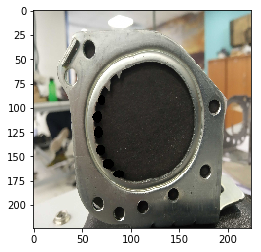

In [56]:
plt.imshow(test_img)